In [3]:
from datetime import datetime, timedelta

#adopted this class from Session 13 preclass-work
class MaxHeapq:
    """
    A class to represent a max-heap
    
    Attributes
    ----------
    heap: arr
        A Python list where key values in the max heap are stored
    length: int
        the number of keys present in the max heap
        
    Methods:
    ----------
    left(i):
        Returns the index of the left child of the input index, if exists
    right(i):
        Returns the index of the right child of the input index, if exists
    parent(i):
        Returns the index of the parent node of the input index, if exists
    heappush(key):
        Adds an element to the heap
    heappop():
        Removes the root node of the heap
    increase_key(i, key):
        Increase the priority of the ith element in the max heap
    heapify(i):
        Puts the i-th element in the heap to one of its correct position
    """
    
    def __init__(self):
        """
        Initiate the attributes for the max-heap
    
        Paremeters
        ---------
        None
        """
        self.heap =  [] #defining the heap list
        self.heap_size = 0 #defining the heap size
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node
        """
        return 2*i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node
        """
        return 2*i + 2

    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node
        """
        return (i-1)//2
    
    def maxk(self):
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue
        """
        return self.heap[0]
    
    def heappush(self, key):
        """
        Insert a key into a priority queue

        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(key)
        self.heap_size += 1
        self.increase_key(self.heap_size - 1, key)


    def heappop(self):
        """
        Returns the larest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('There are no keys')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size -= 1
        self.heapify(0)
        return maxk
        
    def increase_key(self, i, key):
        """
        Modifies the value of a key in a max priority queue
        with a higher value

        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        while i > 0 and key > self.heap[self.parent(i)]:
            self.heap[i] = self.heap[self.parent(i)]
            i = self.parent(i)
        self.heap[i] = key

    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap

        largest = i
        if l <= (self.heap_size - 1) and heap[l] > heap[i]:
            largest = l
        if r <= (self.heap_size - 1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

In [9]:
# A and B were retrieved from pre-class work
A = [4, 3, 6, 8, 2, -5, 100]
my_heap = MaxHeapq()
[my_heap.heappush(k) for k in A]
assert(my_heap.heap == [100, 6, 8, 3, 2, -5, 4])

B = [6,4,7,9,10,-5,-6,12,8,3,1,-10]
her_heap = MaxHeapq()
[her_heap.heappush(k) for k in B]
assert(her_heap.heap == [12, 10, 6, 9, 7, -5, -6, 4, 8, 3, 1, -10])

C = [8, 9, 10, 45, -5, 123, 7]
our_heap = MaxHeapq()
[our_heap.heappush(k) for k in C]
assert our_heap.heap == [123, 10, 45, 8, -5, 9, 7]

In [5]:
class Task:
    """
    A class to represent the Task object
    
    Parameters
    -----------
    _id: Any
        An identification element
    description: str
        A string describing the task
    duration: int
        The time in minutes the activity takes
    dependencies: list
        A list of other tasks the current task depends on
    status: str
        The status of the task
    fixed_time: str
        The fixed time that the task must be executed at
    deadline: str
        The time that the task must be completed by
    people: int
        The number of people involve in the task
        
    Attributes
    ----------
    priority_value:int
        A number representing the tasks priority rank among other tasks   
    
    Methods
    ----------
    calculate_priority_value(current_time)
        Calculate the priority value of a task based on its dependencies, duration, and number of people involved.
    change_status(new_status)
        Set a new status of a task
    """
    
    def __init__(self, id, description, duration, dependencies, status="not_yet_started", fixed_time=None, deadline=None, people=None):
        """
        Initializes the class variables
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.fixed_time = fixed_time # Add a 'fixed time' attribute
        self.deadline = deadline  # Add a 'deadline' attribute
        self.people = people # Add a 'people' attribute
        self.priority_value = None  # Initialize priority value as None


    def calculate_priority_value (self, current_time):
        """
        Calculate the priority value of a task based on its dependencies, duration, and number of people involved
    
        Parameters
        ----------
        current_time: datetime
            The current time to consider when calculating priority.
        """
        task_dependencies = len(self.dependencies)
        task_duration = timedelta(minutes=self.duration)
        task_people = len(self.people) if self.people else 1  # If people is not provided, assume 1 person

        # Formula to calculate priority value
        self.priority_value = (0.5 * task_dependencies) + (0.2 * task_duration.total_seconds()) + (0.7 * task_people)

    def __gt__(self, other):
        """
        Compare two tasks and prioritize tasks by ID if they have the same priority value
        
        Parameters
        ----------
        other: Task
            Another task to compare against

        Returns
        -------
        bool
            True if this task has higher priority than the other task, False otherwise
        """
        # Check if the the tasks have the same priority value:
        if self.priority_value == other.priority_value:
            # Compare and prioritize by IDs
            return self.id > other.id
        return self.priority_value > other.priority_value
    

    def change_status(self, new_status):
        """
        Set a new status of an event
        """
        self.status = new_status

In [6]:
class TaskScheduler:
    """
    Class object representing the Scheduler. Inherited from MaxHeap class.
    
    Attributes
    ----------
    tasks:lst
        A list that stores the tasks to be scheduled
    priority_queue:
        An instance of the MaxHeap class, representing the priority queue 
        to manage tasks based on their priority value
    
    Methods
    ----------
    __init__():
        Initialize the Scheduler class
    remove_dependency(id):
        Remove a task's dependencies with given id
    get_tasks_ready(current_time):
        Identify tasks that are ready to be scheduled
    check_unscheduled_tasks():
        Check if there are unscheduled tasks
    format_time(time):
        Formate the time as a string in 'hh:mm' format
    run_task_scheduler(starting_time):
        Execute the scheduler to schedule tasks given fixed time and deadlines and print output
    """
    
    NOT_STARTED = 'not_yet_started'
    IN_PRIORITY_QUEUE = 'in_priority_queue'
    COMPLETED = 'completed'

    def __init__(self):
        """
        Initialize the Scheduler class
        """
        self.tasks = []  # Initialize with an empty list of tasks
        self.priority_queue = MaxHeapq() # An attribute as a instance of the MaxHeap class
        
    def remove_dependency(self, id):
        """
        Remove a task's dependencies with the given ID
        """
        for task in self.tasks:
            if task.id != id and id in task.dependencies:
                task.dependencies.remove(id)

    def get_tasks_ready(self, current_time):
        """
        Identify tasks that are ready to be scheduled
        """
        for task in self.tasks:
            
            # Check if the task is not yet started and all its dependencies have been completed
            if task.status == self.NOT_STARTED and all(dependency.status == self.COMPLETED for dependency in self.tasks if dependency.id in task.dependencies):
                
                # Calculates the priorty value of the task
                task.calculate_priority_value(current_time)
                
                # Changes the task's status to "in priority queue"
                task.status = self.IN_PRIORITY_QUEUE
                
                # Pushes the task into the priorty queue
                self.priority_queue.heappush(task)

    def check_unscheduled_tasks(self):
        """
        Check if there are unscheduled tasks
        """
        return any(task.status == self.NOT_STARTED for task in self.tasks)

    def format_time(self, time):
        """
        Formate the time as a string in 'hh:mm' format
        
        Parameters:
        ----------
        time: datetime
            the time to format
            
        Returns:
        str: the formatted time
        """
        hours, minutes = time.hour, time.minute
        return f"{hours}h{minutes:02d}"
    

    def run_task_scheduler(self, starting_time):
        """
        Execute the scheduler to schedule tasks given fixed time and deadlines
        """
        current_time = starting_time
        total_time = timedelta(0) # Intitalizes the total time as a timedelta object with a duration of 0

        for task in self.tasks:
            task.status = self.NOT_STARTED

        while self.check_unscheduled_tasks():
            # Find tasks that are ready to be scheduled at the current time
            self.get_tasks_ready(current_time)
            
            if self.priority_queue and self.priority_queue.heap_size > 0:
                # Get the task with the highest priority value from the priority queue
                task = self.priority_queue.heappop()
                task.calculate_priority_value(current_time)


                if task.fixed_time:
                    scheduled_time = datetime.strptime(task.fixed_time, '%I:%M %p')
                    fixed_time = datetime.strptime(task.fixed_time, '%I:%M %p')

                    if current_time > scheduled_time:
                        scheduled_time = current_time
                        current_date = current_time.date()
                        # Ensure both times are on the same date
                        scheduled_time = scheduled_time.replace(year=current_date.year, month=current_date.month, day=current_date.day)
                        fixed_time = fixed_time.replace(year=current_date.year, month=current_date.month, day=current_date.day)
                        
                        # Calculate the new duration to finish on time
                        original_end_time = fixed_time + timedelta(minutes=task.duration)
                        remaining_time = original_end_time - current_time
                        if remaining_time.total_seconds() < 0:
                            # Skip the task
                            task.duration = 0
                        else:
                            task.duration = int(remaining_time.total_seconds() / 60)

                else:
                    scheduled_time = current_time


                if task.deadline:
                    current_date = current_time.date()
                    task_deadline = datetime.strptime(task.deadline, '%I:%M %p')
                    task_deadline = task_deadline.replace(year=current_date.year, month=current_date.month, day=current_date.day)
                    time_to_deadline = task_deadline - current_time
                    if time_to_deadline.total_seconds() < 0:
                        # The deadline has passed, it is marked as missed
                        if task.status != self.COMPLETED:
                            print(f"❌ Task '{task.description}' missed the deadline at {task.deadline}!")
                            task.status = self.COMPLETED
                    elif time_to_deadline.total_seconds() < task.duration * 60:
                        # Not enough time to complete the task before the deadline; reschedule
                        scheduled_time = task_deadline - timedelta(minutes=task.duration)
                    else:
                        # Schedule the task to start as soon as possible
                        if current_time < task_deadline - timedelta(minutes=task.duration):
                            scheduled_time = current_time

                current_time = scheduled_time

                print(f"🕰t={self.format_time(current_time)}")
                if task.deadline:
                    print(f"(Deadline: {task.deadline})")
                if task.fixed_time:
                    print(f"(Fixed Time: {task.fixed_time})")
                    
                print(f"\tstarted '{task.description}' for {task.duration} mins, with priority value = {task.priority_value}")
                
                current_time += timedelta(minutes=task.duration)
                total_time += timedelta(minutes=task.duration)
                print(f"\t✅ t={self.format_time(current_time)}, task completed!")
                self.remove_dependency(task.id)
                task.status = self.COMPLETED

        total_seconds = total_time.total_seconds()

        # Calculate hours and remaining seconds
        hours = total_seconds // 3600
        remaining_seconds = total_seconds % 3600

        # Convert the remaining seconds to minutes
        minutes = remaining_seconds // 60

        total_priority_value = 0
        for task in self.tasks:
            total_priority_value += task.priority_value

        print(f"\n🏁 Completed all planned tasks in {int(hours)}h{minutes}min, with a total utility value of {total_priority_value}!")

In [19]:
tasks = [
    Task(id=1, description='Research about K-Economy', duration=45, dependencies=[]),
    Task(id=2, description='Get ready', duration=30, dependencies=[1], deadline = '9:00 AM'),
    Task(id=3, description='Bus to Seoul Museum of History', duration=80, dependencies=[2]),
    Task(id=4, description='Have breakfast with Sookmyung buddy', duration=40, fixed_time='10:20 AM', 
         dependencies=[2,3], people=[1]),
    Task(id=5, description='Museum tour', duration=60, fixed_time='11:00 AM', dependencies=[1,2,3,4]),
    Task(id=6, description='Take pictures', duration=15, dependencies=[1,2,3,4,5]),
    Task(id=7, description='Submit reflection and report', duration=60, dependencies=[1,2,3,4,5,6], deadline = '4:00 PM'),
    Task(id=8, description='Take a walk around Gyeongbokgung Palace', duration=30, dependencies=[1,2,3,4,5]),
    Task(id=9, description='Get street food and practice Korean', duration=45, dependencies=[1,2,3,4,5,6]),
    Task(id=10, description='Metro back to the residence', duration=30, dependencies=[1,2,3,4,5,6,8,9]),
    Task(id=11, description='Groceries with roommates', duration=20, dependencies=[1,2,3,4,5,6,7,8,9,10], 
         people=[3], deadline = '6:00 PM')
]

scheduler = TaskScheduler()
scheduler.tasks = tasks  # Set the tasks attribute to your list of tasks
original_task_schedule = scheduler.run_task_scheduler(datetime.now().replace(hour=8, minute=30, second=0, microsecond=0))

🕰t=8h30
	started 'Research about K-Economy' for 45 mins, with priority value = 540.7
	✅ t=9h15, task completed!
❌ Task 'Get ready' missed the deadline at 9:00 AM!
🕰t=9h15
(Deadline: 9:00 AM)
	started 'Get ready' for 30 mins, with priority value = 360.7
	✅ t=9h45, task completed!
🕰t=9h45
	started 'Bus to Seoul Museum of History' for 80 mins, with priority value = 960.7
	✅ t=11h05, task completed!
🕰t=11h05
(Fixed Time: 10:20 AM)
	started 'Have breakfast with Sookmyung buddy' for 0 mins, with priority value = 480.7
	✅ t=11h05, task completed!
🕰t=11h05
(Fixed Time: 11:00 AM)
	started 'Museum tour' for 55 mins, with priority value = 720.7
	✅ t=12h00, task completed!
🕰t=12h00
	started 'Take a walk around Gyeongbokgung Palace' for 30 mins, with priority value = 360.7
	✅ t=12h30, task completed!
🕰t=12h30
	started 'Take pictures' for 15 mins, with priority value = 180.7
	✅ t=12h45, task completed!
🕰t=12h45
(Deadline: 4:00 PM)
	started 'Submit reflection and report' for 60 mins, with priority va

In [20]:
tasks = [
    Task(id=1, description='Research about K-Economy', duration=45, dependencies=[]),
    Task(id=2, description='Get ready', duration=30, dependencies=[1], deadline = '9:00 AM'),
    Task(id=3, description='Bus to Seoul Museum of History', duration=20, dependencies=[2]),
    Task(id=4, description='Have breakfast with Sookmyung buddy', duration=40, fixed_time='10:20 AM', 
         dependencies=[2,3], people=[1]),
    Task(id=5, description='Museum tour', duration=60, fixed_time='11:00 AM', dependencies=[1,2,3,4]),
    Task(id=6, description='Take pictures', duration=15, dependencies=[1,2,3,4,5]),
    Task(id=7, description='Submit reflection and report', duration=60, dependencies=[1,2,3,4,5,6], deadline = '4:00 PM'),
    Task(id=8, description='Take a walk around Gyeongbokgung Palace', duration=30, dependencies=[1,2,3,4,5]),
    Task(id=9, description='Get street food and practice Korean', duration=45, dependencies=[1,2,3,4,5,6]),
    Task(id=10, description='Metro back to the residence', duration=30, dependencies=[1,2,3,4,5,6,8,9]),
    Task(id=11, description='Groceries with roommates', duration=20, dependencies=[1,2,3,4,5,6,7,8,9,10], 
         people=[3], deadline = '6:00 PM')
]

tasks_reorder = [
    Task(id=1, description='Research about K-Economy', duration=45, dependencies=[]),
    Task(id=8, description='Take a walk around Gyeongbokgung Palace', duration=30, dependencies=[1,2,3,4,5]),
    Task(id=10, description='Metro back to the residence', duration=30, dependencies=[1,2,3,4,5,6,8,9]),
    Task(id=4, description='Have breakfast with Sookmyung buddy', duration=40, fixed_time='10:20 AM', 
         dependencies=[2,3], people=[1]),
    Task(id=7, description='Submit reflection and report', duration=60, dependencies=[1,2,3,4,5,6], deadline='4:00 PM'),
    Task(id=2, description='Get ready', duration=30, dependencies=[1], deadline='9:00 AM'),
    Task(id=5, description='Museum tour', duration=60, fixed_time='11:00 AM', dependencies=[1,2,3,4]),
    Task(id=3, description='Bus to Seoul Museum of History', duration=20, dependencies=[2]),
    Task(id=9, description='Get street food and practice Korean', duration=45, dependencies=[1,2,3,4,5,6]),
    Task(id=6, description='Take pictures', duration=15, dependencies=[1,2,3,4,5]),
    Task(id=11, description='Groceries with roommates', duration=20, dependencies=[1,2,3,4,5,6,7,8,9,10], 
         people=[3], deadline='6:00 PM')
]

scheduler = TaskScheduler()
scheduler.tasks = tasks  # Set the tasks attribute to your list of tasks
original_task_schedule = scheduler.run_task_scheduler(datetime.now().replace(hour=8, minute=30, second=0, microsecond=0))

scheduler2 = TaskScheduler()
scheduler2.tasks = tasks_reorder  # Set the tasks attribute to the reorder list of tasks
reordered_task_schedule = scheduler2.run_task_scheduler(datetime.now().replace(hour=8, minute=30, second=0, microsecond=0))

assert original_task_schedule == reordered_task_schedule

🕰t=8h30
	started 'Research about K-Economy' for 45 mins, with priority value = 540.7
	✅ t=9h15, task completed!
❌ Task 'Get ready' missed the deadline at 9:00 AM!
🕰t=9h15
(Deadline: 9:00 AM)
	started 'Get ready' for 30 mins, with priority value = 360.7
	✅ t=9h45, task completed!
🕰t=9h45
	started 'Bus to Seoul Museum of History' for 20 mins, with priority value = 240.7
	✅ t=10h05, task completed!
🕰t=10h05
(Fixed Time: 10:20 AM)
	started 'Have breakfast with Sookmyung buddy' for 55 mins, with priority value = 480.7
	✅ t=11h00, task completed!
🕰t=11h00
(Fixed Time: 11:00 AM)
	started 'Museum tour' for 60 mins, with priority value = 720.7
	✅ t=12h00, task completed!
🕰t=12h00
	started 'Take a walk around Gyeongbokgung Palace' for 30 mins, with priority value = 360.7
	✅ t=12h30, task completed!
🕰t=12h30
	started 'Take pictures' for 15 mins, with priority value = 180.7
	✅ t=12h45, task completed!
🕰t=12h45
(Deadline: 4:00 PM)
	started 'Submit reflection and report' for 60 mins, with priority v

🕰t=8h30
	started 'Task 1' for 60 mins, with priority value = 720.7
	✅ t=9h30, task completed!

🏁 Completed all planned tasks in 1h0.0min, with a total utility value of 720.7!
🕰t=8h30
	started 'Task 1' for 60 mins, with priority value = 720.7
	✅ t=9h30, task completed!

🏁 Completed all planned tasks in 1h0.0min, with a total utility value of 720.7!
🕰t=8h30
	started 'Task 1' for 60 mins, with priority value = 720.7
	✅ t=9h30, task completed!

🏁 Completed all planned tasks in 1h0.0min, with a total utility value of 720.7!
🕰t=8h30
	started 'Task 1' for 60 mins, with priority value = 720.7
	✅ t=9h30, task completed!

🏁 Completed all planned tasks in 1h0.0min, with a total utility value of 720.7!
🕰t=8h30
	started 'Task 1' for 60 mins, with priority value = 720.7
	✅ t=9h30, task completed!

🏁 Completed all planned tasks in 1h0.0min, with a total utility value of 720.7!
🕰t=8h30
	started 'Task 1' for 60 mins, with priority value = 720.7
	✅ t=9h30, task completed!

🏁 Completed all planned tasks 

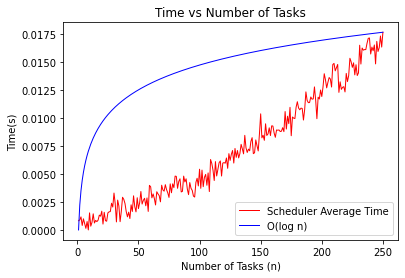

In [10]:
import random
import numpy as np
from datetime import datetime
import time
from matplotlib import pyplot as plt
import math  # Import the math module

def task_generator(id=None, description=None, duration=60, dependencies=[],fixed_time=None,deadline=None):
    """
    Generate a task, with defualt attributes provided wehre necessary.
    Parameters
    -----------
    _id:Any
    An identification element of the task
    description:str
    A string describing the task
    duration:int
    The time in minutes the activity takes
    dependencies:list
    18
    A list of other tasks the current task depends on
    utility:int
    The utility of the task
    Return
    ------
    Task
    A `Task` object
    """
    #generate random id if not provided
    if id is None:
        id = random.randint(1000000, 10000000)
    #generate description based on id if description is not provided
    if description is None:
        description = "Task {id}".format(id=id)
    return Task(id, description, duration, dependencies,fixed_time,deadline)

random.seed(42)

n = 250  # Maximum number of tasks to generate
iterations = 15  # Number of iterations for each input size

# Create tasks
tasks = []
for i in range(n):
    dependencies = []
    if i > 5:
        dependencies = random.sample(tasks, 3)
    task = task_generator(id=i, dependencies=dependencies,)  # Corrected the function call
    tasks.append(task)


# Create an empty list to store the execution times for different input sizes
scheduler_avg_time = []

# Iterate n times, increasing tasks size and timing the scheduler run method runtime
for n in range(1, n + 1):
    scheduler_time = []
    for trial in range(iterations):
        # Create tasks with controlled input size (1 to n)
        tasks = [task_generator(id=i, dependencies=[]) for i in range(1, n + 1)]
        
        scheduler = TaskScheduler()
        scheduler.tasks = tasks  # Set the tasks attribute to the generated tasks
        
        start_time = time.time()
        scheduler.run_task_scheduler(datetime.now().replace(hour=8, minute=30, second=0, microsecond=0))
        end_time = time.time()
        
        scheduler_time.append(end_time - start_time)
    
    # Calculate the average execution time for the current input size
    scheduler_avg_time.append(np.sum(scheduler_time) / iterations)

# Calculate O(log n) values
log_values = [math.log2(x) for x in range(1, n + 1)]

# Normalize the log values to the maximum execution time
max_execution_time = max(scheduler_avg_time)
normalized_log_values = [val * (max_execution_time / max(log_values)) for val in log_values]

# Visualize the data
plt.plot(range(1, n + 1), scheduler_avg_time, color='red', label='Scheduler Average Time', linewidth=1.0)
plt.plot(range(1, n + 1), normalized_log_values, color='blue', label='O(log n)', linewidth=1.0)
plt.xlabel('Number of Tasks (n)', fontsize=10)
plt.ylabel('Time(s)', fontsize=10)
plt.title("Time vs Number of Tasks")
plt.legend()
plt.show()